# Penrose tiling: kites and darts

Construct Penrose kite and dart tiles algorithmically in Julia. Based on Martin Gardner's *Mathematical Games* column from January 1977 Scientific American.

2024-09-10 J. Gibson, University of New Hampshire, for *Tech 411.05 Patterns and Symmetry* 

## The rhombus

Our task is to recreate this image programmatically in Julia. I'll show how to do that step by step, and then
I'll consolidate all that code into a function we can use to make a grid of tiles.

![rhombus](rhombus.png)

## Step-by-step approach

We'll first draw the corners, then add the lines. We'll need to express the vertices as 2d vectors on
the $(x,y)$ plane. Note that $36^\circ = \frac{\pi}{5}, 72^\circ = \frac{2\pi}{5}$, etc.

In [1]:
# Calculate golden ratio

ϕ = (1+sqrt(5))/2

1.618033988749895

In [2]:
# Specify the four corners of the rhombus as vectors A, B, C, D starting 
# from the bottom-left corner and going counter-clockwise, starting with
# A at the origin.

A = [0; 0]  # (x,y) coordinate of bottom-left corner
B = [ϕ; 0]
C = B + [ϕ*cos(2π/5); ϕ*sin(2π/5)]
D = A + [ϕ*cos(2π/5); ϕ*sin(2π/5)]

# note that Julia prints out the value of the last statement executed,
# in this case the value of the vector D

2-element Vector{Float64}:
 0.5000000000000001
 1.5388417685876268

In [3]:
# Put A, B, C, D into a matrix X, so they all can be manipulated and plotted together.

X = [A B C D]

2×4 Matrix{Float64}:
 0.0  1.61803  2.11803  0.5
 0.0  0.0      1.53884  1.53884

In [4]:
# The X matrix stores the x coordinates of A,B,C,D,A in its first row and the y coordinates in the second.

# X[1,:] gives you the 1st row of X, all the x coordinates
# X[2,:] gives you the 2nd row of X, all the y coordinates

@show X[1,:]
@show X[2,:];

X[1, :] = [0.0, 1.618033988749895, 2.118033988749895, 0.5000000000000001]
X[2, :] = [0.0, 0.0, 1.5388417685876268, 1.5388417685876268]


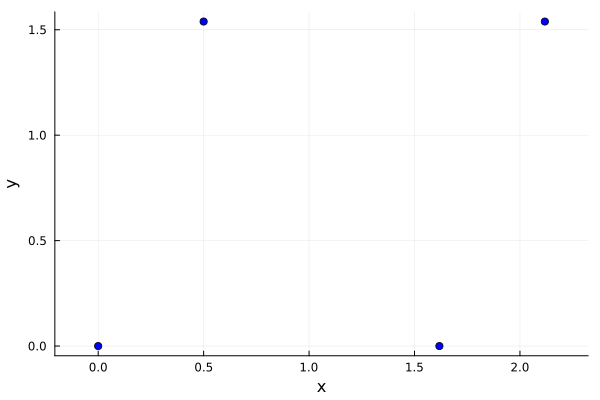

In [5]:
# Make a scatter plot of the vertices (corners). Plotting functions generally
# work like plot(x, y) where x and y are vectors of x and y coordinates. So 
# we plug in X[1,:] and X[2,:] as the x and y vectors for the scatter plot. 

# Note that plot!(...) modifies a previous plot, whereas plot(...) starts a new plot.
# Same with scatter!(...) and scatter(...)

using Plots
scatter(X[1,:], X[2,:], markercolor=:blue, label="")
plot!(xlabel="x", ylabel="y", aspect_ratio=:equal)

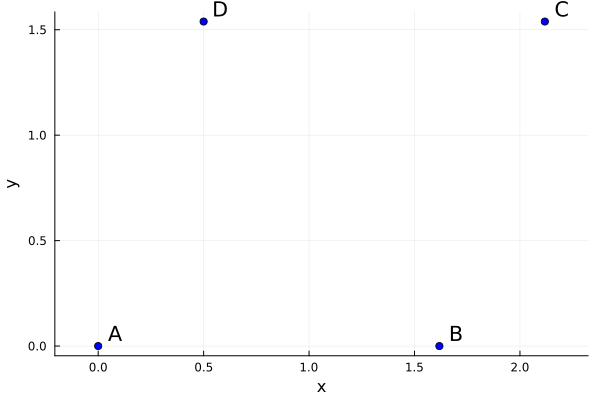

In [6]:
# Add labels to the vertices. Note that I added offsets of 0.06 to both the 
# x and y coordinates so that the labels aren't right on top of the dots. 
# We use "X[1,:] .+ 0.08" to add the scalar 0.06 to *each component* of the
# vector X[1,:]. This is called "dot syntax." It expands 0.06 to a vector of
# same dimension as X[1,:], and then adds the two vectors. 

annotate!(X[1,:] .+ 0.08, X[2,:] .+ 0.06, ["A"; "B"; "C"; "D"])

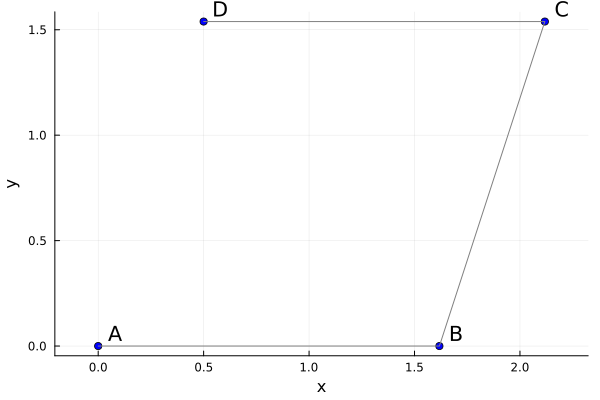

In [7]:
# Now add a black line connecting the vertices.

plot!(X[1,:], X[2,:], linecolor=:grey, label="")

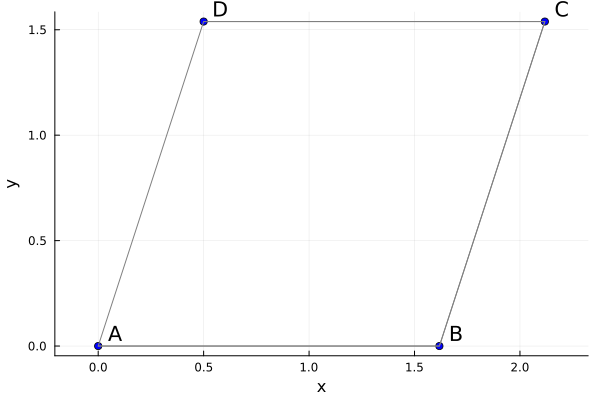

In [8]:
# Oops! The line didn't close! We need to plot a line connecting A,B,C,D, and back to A
# So revise X and replot

X = [A B C D A] 
plot!(X[1,:], X[2,:], linecolor=:grey, label="")

In [9]:
# Calculate the point E where the kite and dart meet, using trig on the rhombus figure at the top.

E = [ϕ*cos(π/5); ϕ*sin(π/5)]

2-element Vector{Float64}:
 1.3090169943749475
 0.9510565162951536

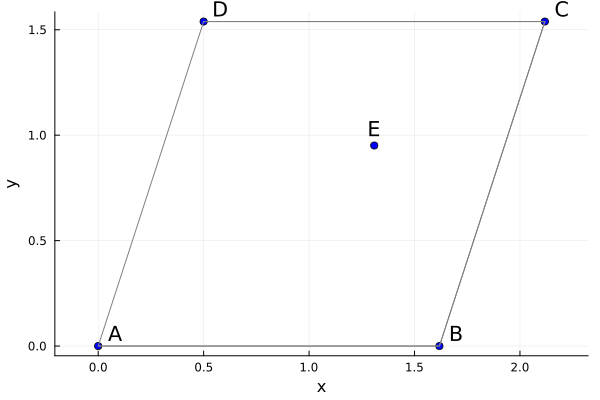

In [10]:
# Plot point E

scatter!(E[1,:], E[2,:], markercolor=:blue, label="")
annotate!(E[1,:], E[2,:] .+ 0.08, ["E"])

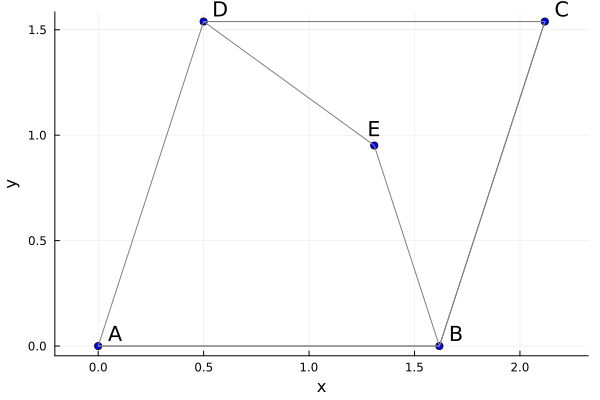

In [11]:
# Now plot lines connecting B, E, D

BED = [B E D]
plot!(BED[1,:], BED[2,:], linecolor=:grey, label="")

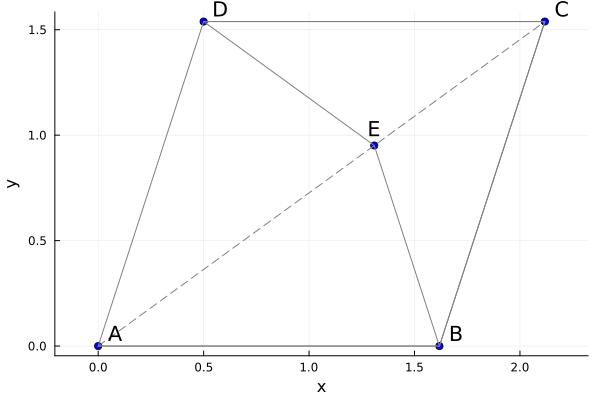

In [12]:
# And a dashed line from A to C

AC = [A C]
plot!(AC[1,:], AC[2,:], linecolor=:grey, linestyle=:dash, label="")

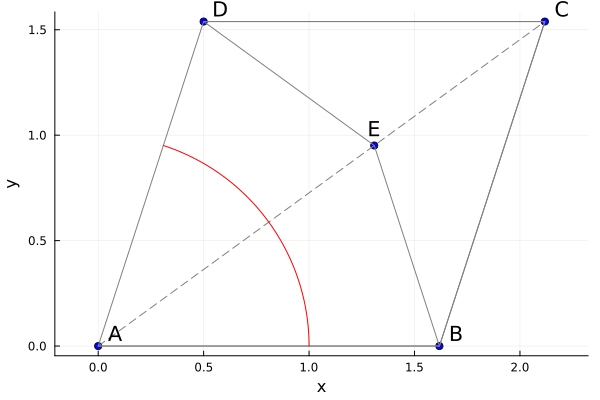

In [13]:
# Now plot an arc of radius 1 centered at A going from the AB line to the AD line.
# In angular terms, that's 0 ≤ θ ≤ 2π/5. 

# The θ = 0 : π/100 : 2π/5 syntax means "make a vector of values from 0 to 2π/5 in steps of π/100"

# The cos.(θ) syntax means "apply cos to each value in the vector θ = [θ₁; θ₂; ...]"

r = 1.0
θ = 0 : π/100 : 2π/5
plot!(r*cos.(θ), r*sin.(θ), linecolor=:red, label="")

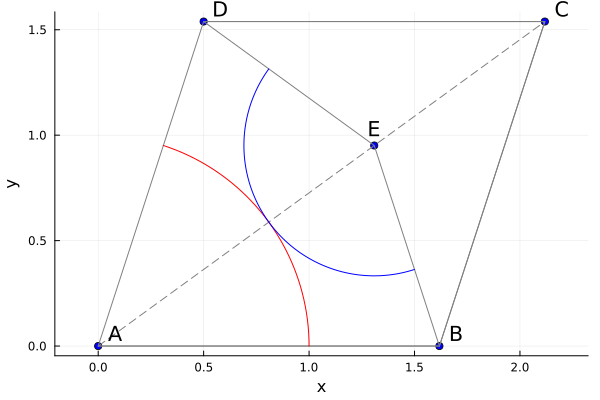

In [14]:
# Now make a blue circle centered at E going from θ = 4π/5 to 8π/5.
# Here we use a different syntax that constructs a vector of θ values
# going over the specified interval in 100 equal steps.

r = 1/ϕ
θ = range(4π/5, 8π/5, length=100)

plot!(E[1] .+ r*cos.(θ), E[2] .+ r*sin.(θ), linecolor=:blue, label="")

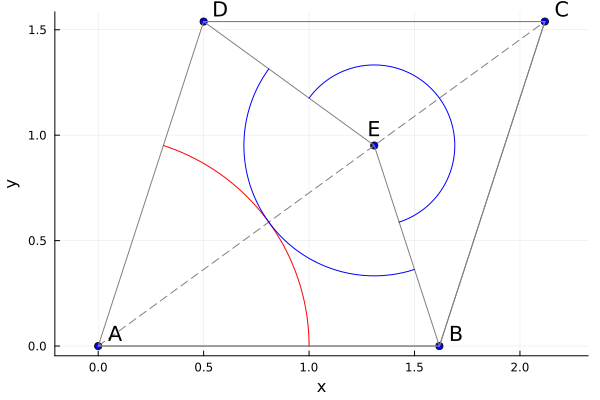

In [15]:
# Add the smaller circle above E

r = 1/ϕ^2
θ = range(-2π/5, 4π/5, length=100)

plot!(E[1] .+ r*cos.(θ), E[2] .+ r*sin.(θ), linecolor=:blue, label="")

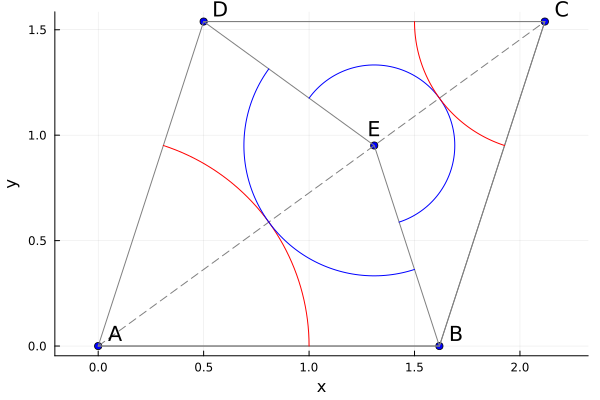

In [16]:
# And the small circle around C

r = 1/ϕ
θ = range(π, 7π/5, length=100)

plot!(C[1] .+ r*cos.(θ), C[2] .+ r*sin.(θ), linecolor=:red, label="")

In [17]:
# Yay, we made the figure! We can save it as a PDF with

savefig("kite-dart-rhombus.pdf")

"/home/gibson/gitworking/tech411/kite-dart-rhombus.pdf"

### Consolidate into a function

Next I'll consolidate all that code into a function that plots the rhombus with a single command.
I'll change a few things to make it appropriate for plotting a bunch of rhombi in a grid, namely

  * no labels on vertices, no dashed diagonal line
  * plot red arcs with dashed lines so they're distinguished when printed in black and white
  * shift the position of the rhombus by an offset *origin* and scale its size by *scale*.
  * make two versions of the function, one that starts a new plot, one that adds to an old plot.

In [18]:
function plotkitedart!(origin, scale)
    ϕ = (1+sqrt(5))/2
    
    A = origin
    B = origin + scale*[ϕ;0]
    D = origin + scale*[ϕ*cos(2π/5); ϕ*sin(2π/5)]
    C = D + scale*[ϕ;0]
    
    E = origin + scale*[ϕ*cos(π/5); ϕ*sin(π/5)]
    
    X = [A B C D A]
  
    plot!(aspect_ratio=:equal, grid=:none)
    plot!(X[1,:], X[2,:], linecolor=:grey, label="")

    BED = [B E D]
    plot!(BED[1,:], BED[2,:], linecolor=:grey, label="")

    θ = range(0, 2π/5, length=100)
    r = 1 * scale
    plot!(A[1] .+ r*cos.(θ), A[2] .+ r*sin.(θ), linecolor=:red, label="", linestyle=:dash)

    r = 1/ϕ * scale
    θ = range(4π/5, 8π/5, length=100)
    plot!(E[1] .+ r*cos.(θ), E[2] .+ r*sin.(θ), linecolor=:blue, label="")

    r = 1/ϕ^2 * scale
    θ = range(-2π/5, 4π/5, length=100)
    plot!(E[1] .+ r*cos.(θ), E[2] .+ r*sin.(θ), linecolor=:blue, label="")

    r = 1/ϕ *scale
    θ = range(π, 7π/5, length=100)
    plot!(C[1] .+ r*cos.(θ), C[2] .+ r*sin.(θ), linecolor=:red, label="", linestyle=:dash)
end

function plotkitedart(origin, scale)
    plot()
    plotkitedart!(origin, scale)
end

plotkitedart (generic function with 1 method)

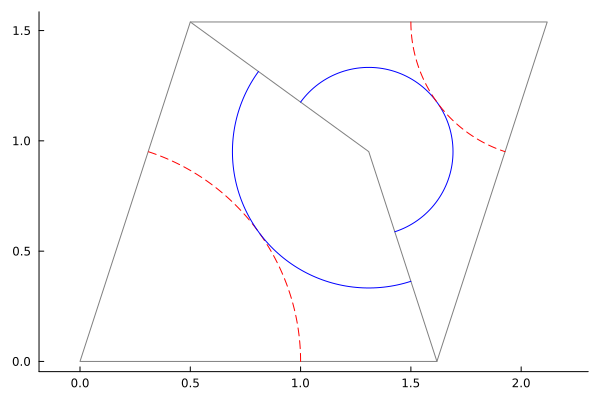

In [19]:
plotkitedart([0;0], 1)

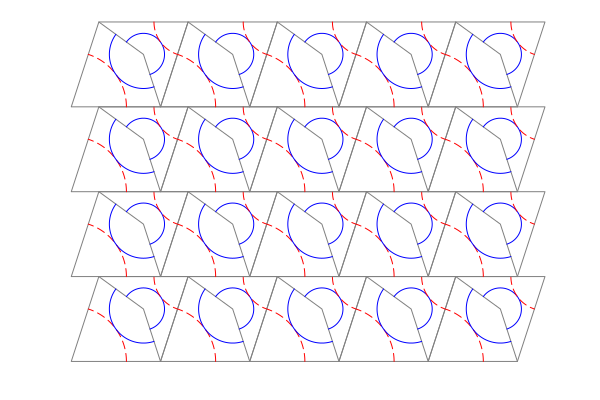

In [20]:
# Now plot a whole grid of kites and darts, and save the plot to a file as PDF

plot(xlabel="", ylabel="", axis=:off)

for i=0:4
    for j=0:3
        plotkitedart!([i*ϕ; j*ϕ*sin(2π/5)], 1)
    end
end
plot!()

In [21]:
savefig("kite-dart-grid.pdf")

"/home/gibson/gitworking/tech411/kite-dart-grid.pdf"